# Dataset Used: Human Lung epithelial cell raw counts

### Single cell analysis on Human Lung epithelial to elucidate the expression of ACE2 & TMPRSS2

In [1]:
# Libraries used for analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.cluster import KMeans
import anndata
from matplotlib import rcParams

In [2]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=150, frameon=True, vector_friendly=True, fontsize=14, figsize=None, color_map=None, format='png', facecolor=None, transparent=False, ipython_format='png2x')

In [3]:
sc._settings.ScanpyConfig.figdir

In [4]:
data=pd.read_csv("Human_Lung/lung_epithelial_dataset.csv",index_col=0)

In [5]:
np.shape(data)

(22560, 1002)

In [6]:
data.head()

,GENE,TACAGTGATAGC_1,GAATGTTACATC_1,GACAGTGATAGC_1,CCGTTGAAAGGA_1,TGTCTCAATGTA_1,CTCTCTTAACTC_1,TCGGGCATGCCC_1,GGGCCAATCGCT_1,ATCCCGCCTGAA_1,...,CCCTGCTAACTG_2,ATTGCGCAGGGG_2,CACCGGGGGACC_2,TCCCCACATGCA_2,CGACCGCTGTCG_2,GCCCCGACGCAC,GCCGCGTGGCGC,TTTGTCAAAGCA,CGGAAGTACCGC,GAGTGGCGCGCC
1,A1BG-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A2M,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A2M-AS1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A2ML1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,A4GALT,0,4,0,0,0,0,4,0,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = data.set_index('GENE') 

In [8]:
data.head()

,TACAGTGATAGC_1,GAATGTTACATC_1,GACAGTGATAGC_1,CCGTTGAAAGGA_1,TGTCTCAATGTA_1,CTCTCTTAACTC_1,TCGGGCATGCCC_1,GGGCCAATCGCT_1,ATCCCGCCTGAA_1,CCCTACATGGTG_1,...,CCCTGCTAACTG_2,ATTGCGCAGGGG_2,CACCGGGGGACC_2,TCCCCACATGCA_2,CGACCGCTGTCG_2,GCCCCGACGCAC,GCCGCGTGGCGC,TTTGTCAAAGCA,CGGAAGTACCGC,GAGTGGCGCGCC
GENE,,,,,,,,,,,,,,,,,,,,,
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,4,0,0,0,0,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data=data.transpose()

In [10]:
data.describe()

GENE,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,AC010441.1,AC073130.1,CASC9,PLSCR2,PRPH2,RP11-105N14.3,RP11-298E2.2,RP11-6O2.4,RP5-1069C8.2,RP5-1139B12.2
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0
mean,0.007992,0.046953,0.000999,0.000999,0.024975,0.025974,0.054945,0.194805,0.098901,0.041958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.141195,0.323718,0.031607,0.031607,0.233186,0.243567,0.346378,1.039718,0.539638,0.249475,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,4.000000,5.000000,1.000000,1.000000,4.000000,5.000000,6.000000,25.000000,12.000000,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Remove those genes which are not expressed in any cell
data = data.loc[:, (data != 0).any(axis=0)]

In [12]:
# modified dimensions of the human lung epithelial dataset 
np.shape(data)

(1001, 17773)

In [13]:
y=data.describe()

In [14]:
# maxiumum number of RNA transcripts
np.max(y.iloc[7])

15979.0

In [15]:
data.to_csv("file1.csv")

In [16]:
adata=anndata.read_csv("file1.csv")

In [17]:
adata

AnnData object with n_obs × n_vars = 1001 × 17773

### Some parameters for downstream analysis

In [18]:
# marker genes
RIBO_GENE_PREFIX = "RPS" # Prefix for ribosomal genes to regress out
markers = ["ACE2", "TMPRSS2", "EPCAM"] # Marker genes for visualization

# filtering cells
min_genes_per_cell = 200 # Filter out cells with fewer genes than this expressed 
max_genes_per_cell = 6000 # Filter out cells with more genes than this expressed 

# filtering genes
n_top_genes = 5000 # Number of highly variable genes to retain

# PCA
n_components = 50 # Number of principal components to compute

# t-SNE
tsne_n_pcs = 20 # Number of principal components to use for t-SNE

# k-means
k = 35 # Number of clusters for k-means

# KNN
n_neighbors = 15 # Number of nearest neighbors for KNN graph
knn_n_pcs = 50 # Number of principal components to use for finding nearest neighbors

# UMAP
umap_min_dist = 0.3 
umap_spread = 1.0

# Gene ranking
ranking_n_top_genes = 50 # Number of differential genes to compute for each cluster

# Number of parallel jobs for t-SNE and k-means
n_jobs=32

## Dataset preprocessing

### Filtering of cells and genes

In [19]:
sc.pp.filter_cells(adata, min_genes=min_genes_per_cell)
sc.pp.filter_cells(adata, max_genes=max_genes_per_cell)

In [20]:
sc.pp.filter_genes(adata, min_cells=1)

### Normalization

In [21]:
sc.pp.normalize_total(adata, target_sum=1e4)

### log transformation

In [22]:
sc.pp.log1p(adata) 

In [23]:
adata

AnnData object with n_obs × n_vars = 995 × 17628
    obs: 'n_genes'
    var: 'n_cells'
    uns: 'log1p'

### Select Most Variable Genes

In [24]:
# Select highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor="cell_ranger")

# Retain marker gene expression
for marker in markers:
    adata.obs[marker+"_raw"]= adata.X[:, adata.var.index==marker]

adata = adata.copy()
n_genes = sum(adata.var.highly_variable)

# Filter matrix to only variable genes
adata = adata[:, adata.var.highly_variable]

### Regress out confounding factors (number of counts, ribosomal gene expression)

In [25]:
ribo_genes = adata.var_names.str.startswith(RIBO_GENE_PREFIX)

In [26]:
n_counts = np.array(adata.X.sum(axis=1))
adata.obs['percent_ribo'] = np.array(np.sum(adata[:, ribo_genes].X, axis=1)) / n_counts
adata.obs['n_counts'] = n_counts

Trying to set attribute `.obs` of view, copying.


In [27]:
sc.pp.regress_out(adata, ['n_counts', 'percent_ribo'])

### Data Scaling

In [28]:
sc.pp.scale(adata, max_value=10)

## Clustering and Visualization

In [29]:
# PCA (Principal Component Analysis)
 
sc.tl.pca(adata, n_comps=n_components)

### TSNE + KMeans

In [30]:
sc.tl.tsne(adata, n_pcs=tsne_n_pcs, n_jobs=n_jobs)

In [31]:
kmeans = KMeans(n_clusters=k, random_state=0, n_jobs=n_jobs).fit(adata.obsm['X_pca'])
adata.obs['kmeans'] = kmeans.labels_.astype(str)

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


... storing 'kmeans' as categorical


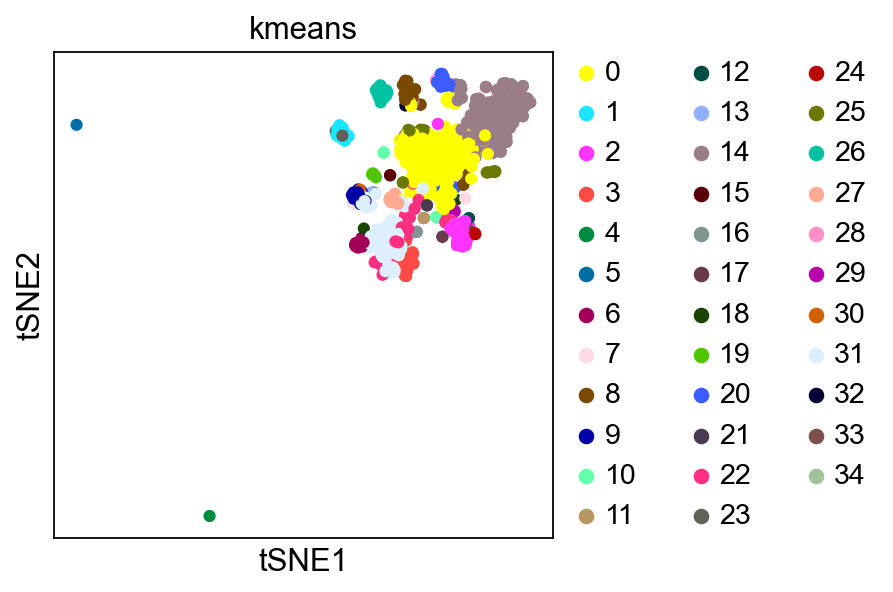

In [32]:
sc.pl.tsne(adata, color=["kmeans"],save="kmeans.png")

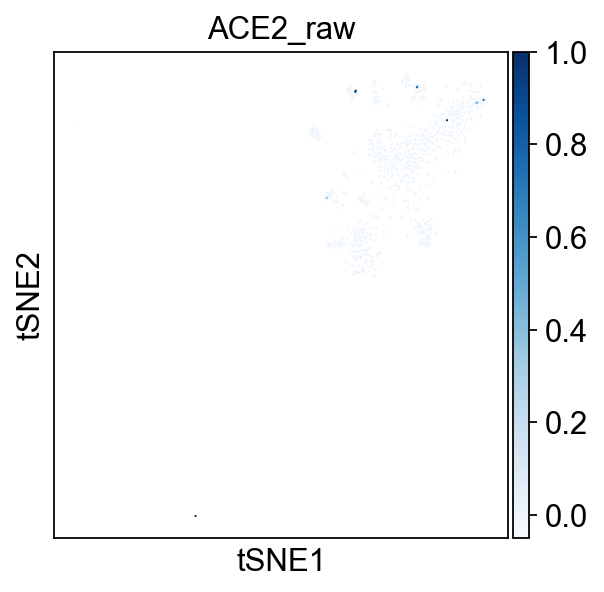

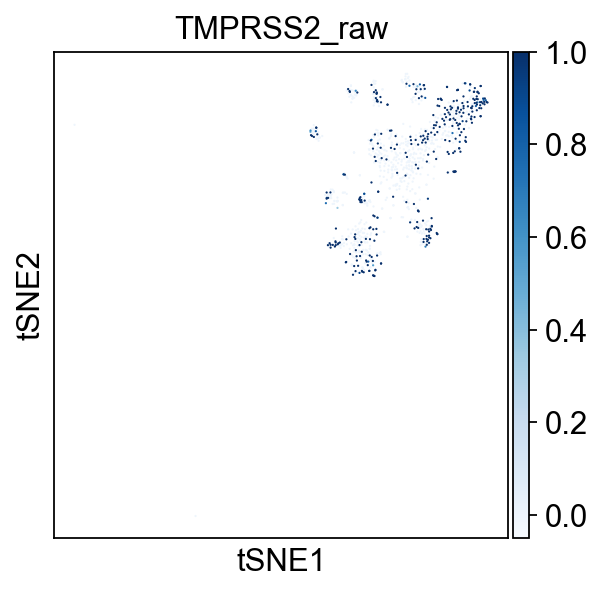

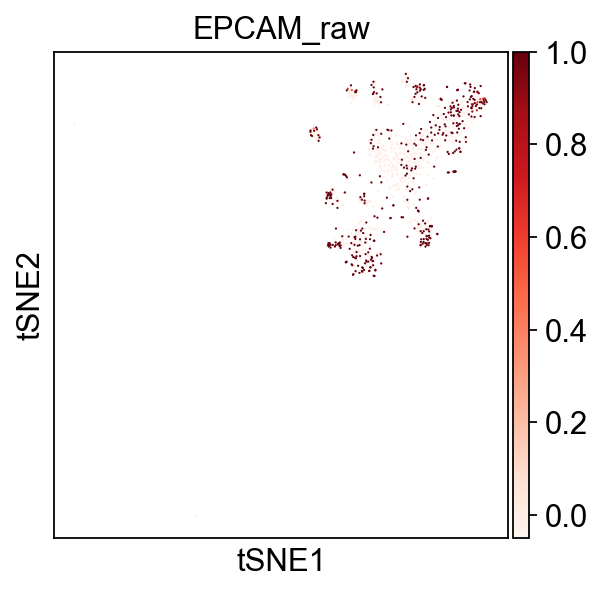

In [33]:
sc.pl.tsne(adata, size=4, color=["ACE2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="tSNE_ACE2.png")
sc.pl.tsne(adata, size=4, color=["TMPRSS2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="tSNE_TMPRSS2.png")
sc.pl.tsne(adata, size=4, color=["EPCAM_raw"], color_map="Reds", vmax=1,  vmin=-0.05,save="tSNE_EPCAM.png")

### UMAP + Graph Clustering

In [34]:
# KNN graph
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=knn_n_pcs)

In [35]:
# UMAP
sc.tl.umap(adata, min_dist=umap_min_dist, spread=umap_spread)

In [36]:
# Louvain clustering
sc.tl.louvain(adata)

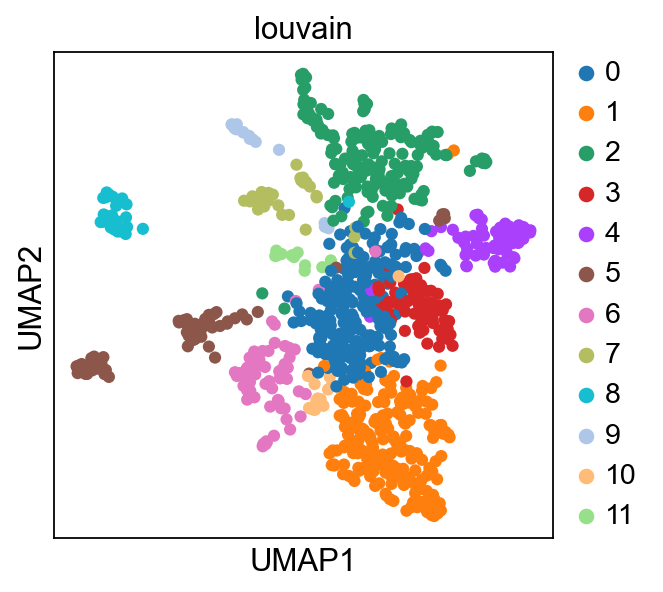

In [37]:
# Plot
sc.pl.umap(adata, color=["louvain"],save="umap_louvain.png")

In [38]:
# Leiden clustering
sc.tl.leiden(adata)

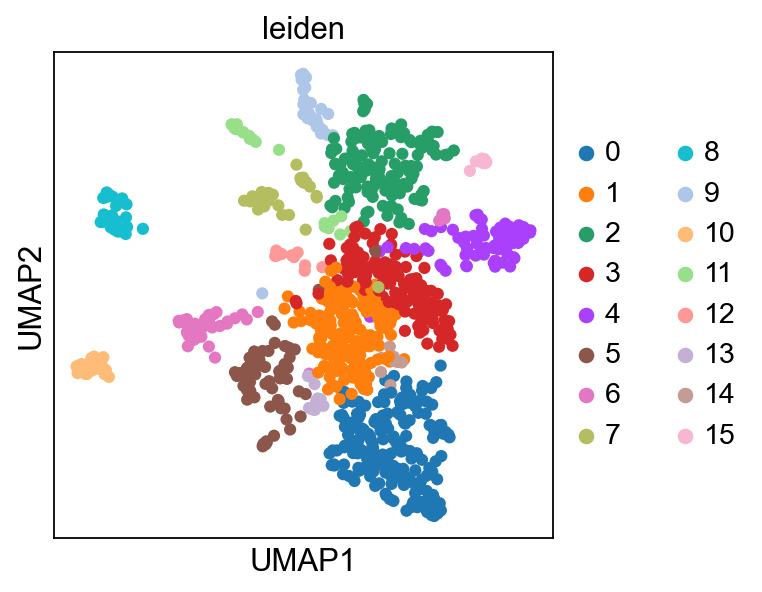

In [39]:
# Plot
sc.pl.umap(adata, color=["leiden"],save="umap_leiden.png")

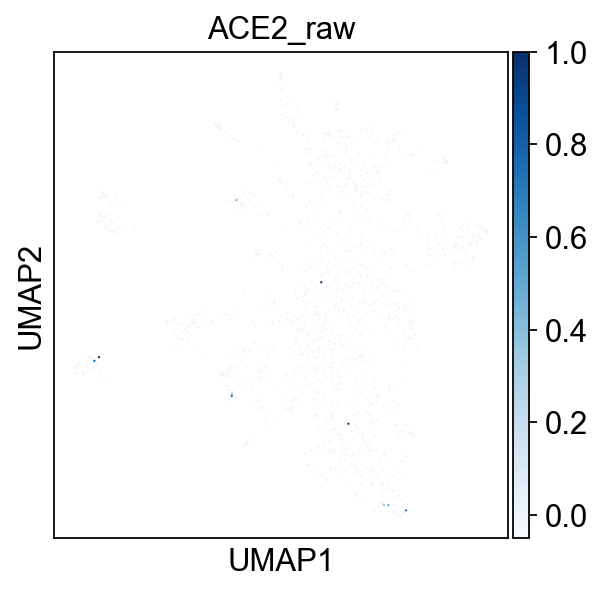

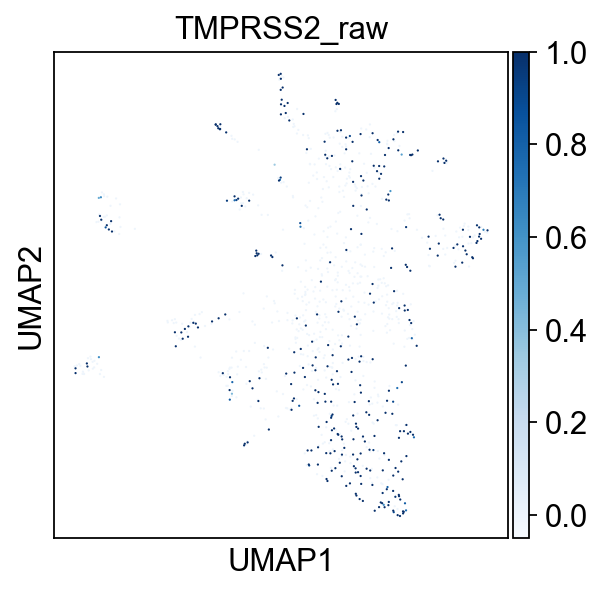

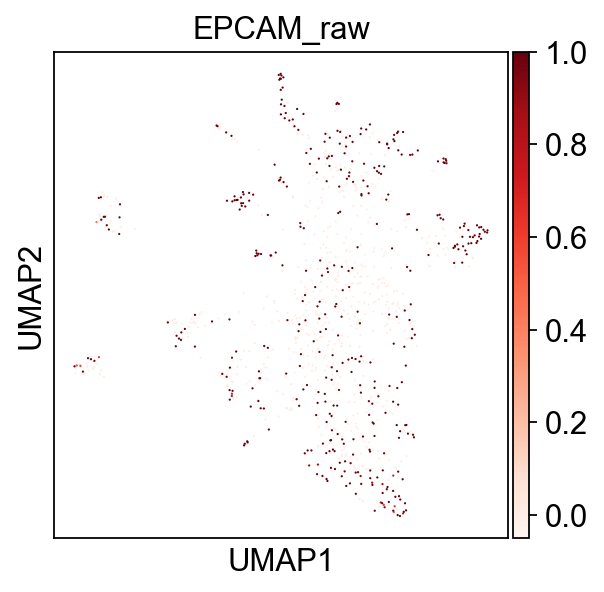

In [40]:
sc.pl.umap(adata, size=4,color=["ACE2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="ACE2_raw_umap.png")
sc.pl.umap(adata, size=4, color=["TMPRSS2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="TMPRSS2_raw_umap.png")
sc.pl.umap(adata, size=4, color=["EPCAM_raw"], color_map="Reds", vmax=1, vmin=-0.05,save="EPCAM_raw_umap.png")

## Differential expression analysis

In [41]:
sc.tl.rank_genes_groups(adata, groupby="louvain", n_genes=ranking_n_top_genes, groups='all', reference='rest', method='logreg')

C:\Users\abhay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


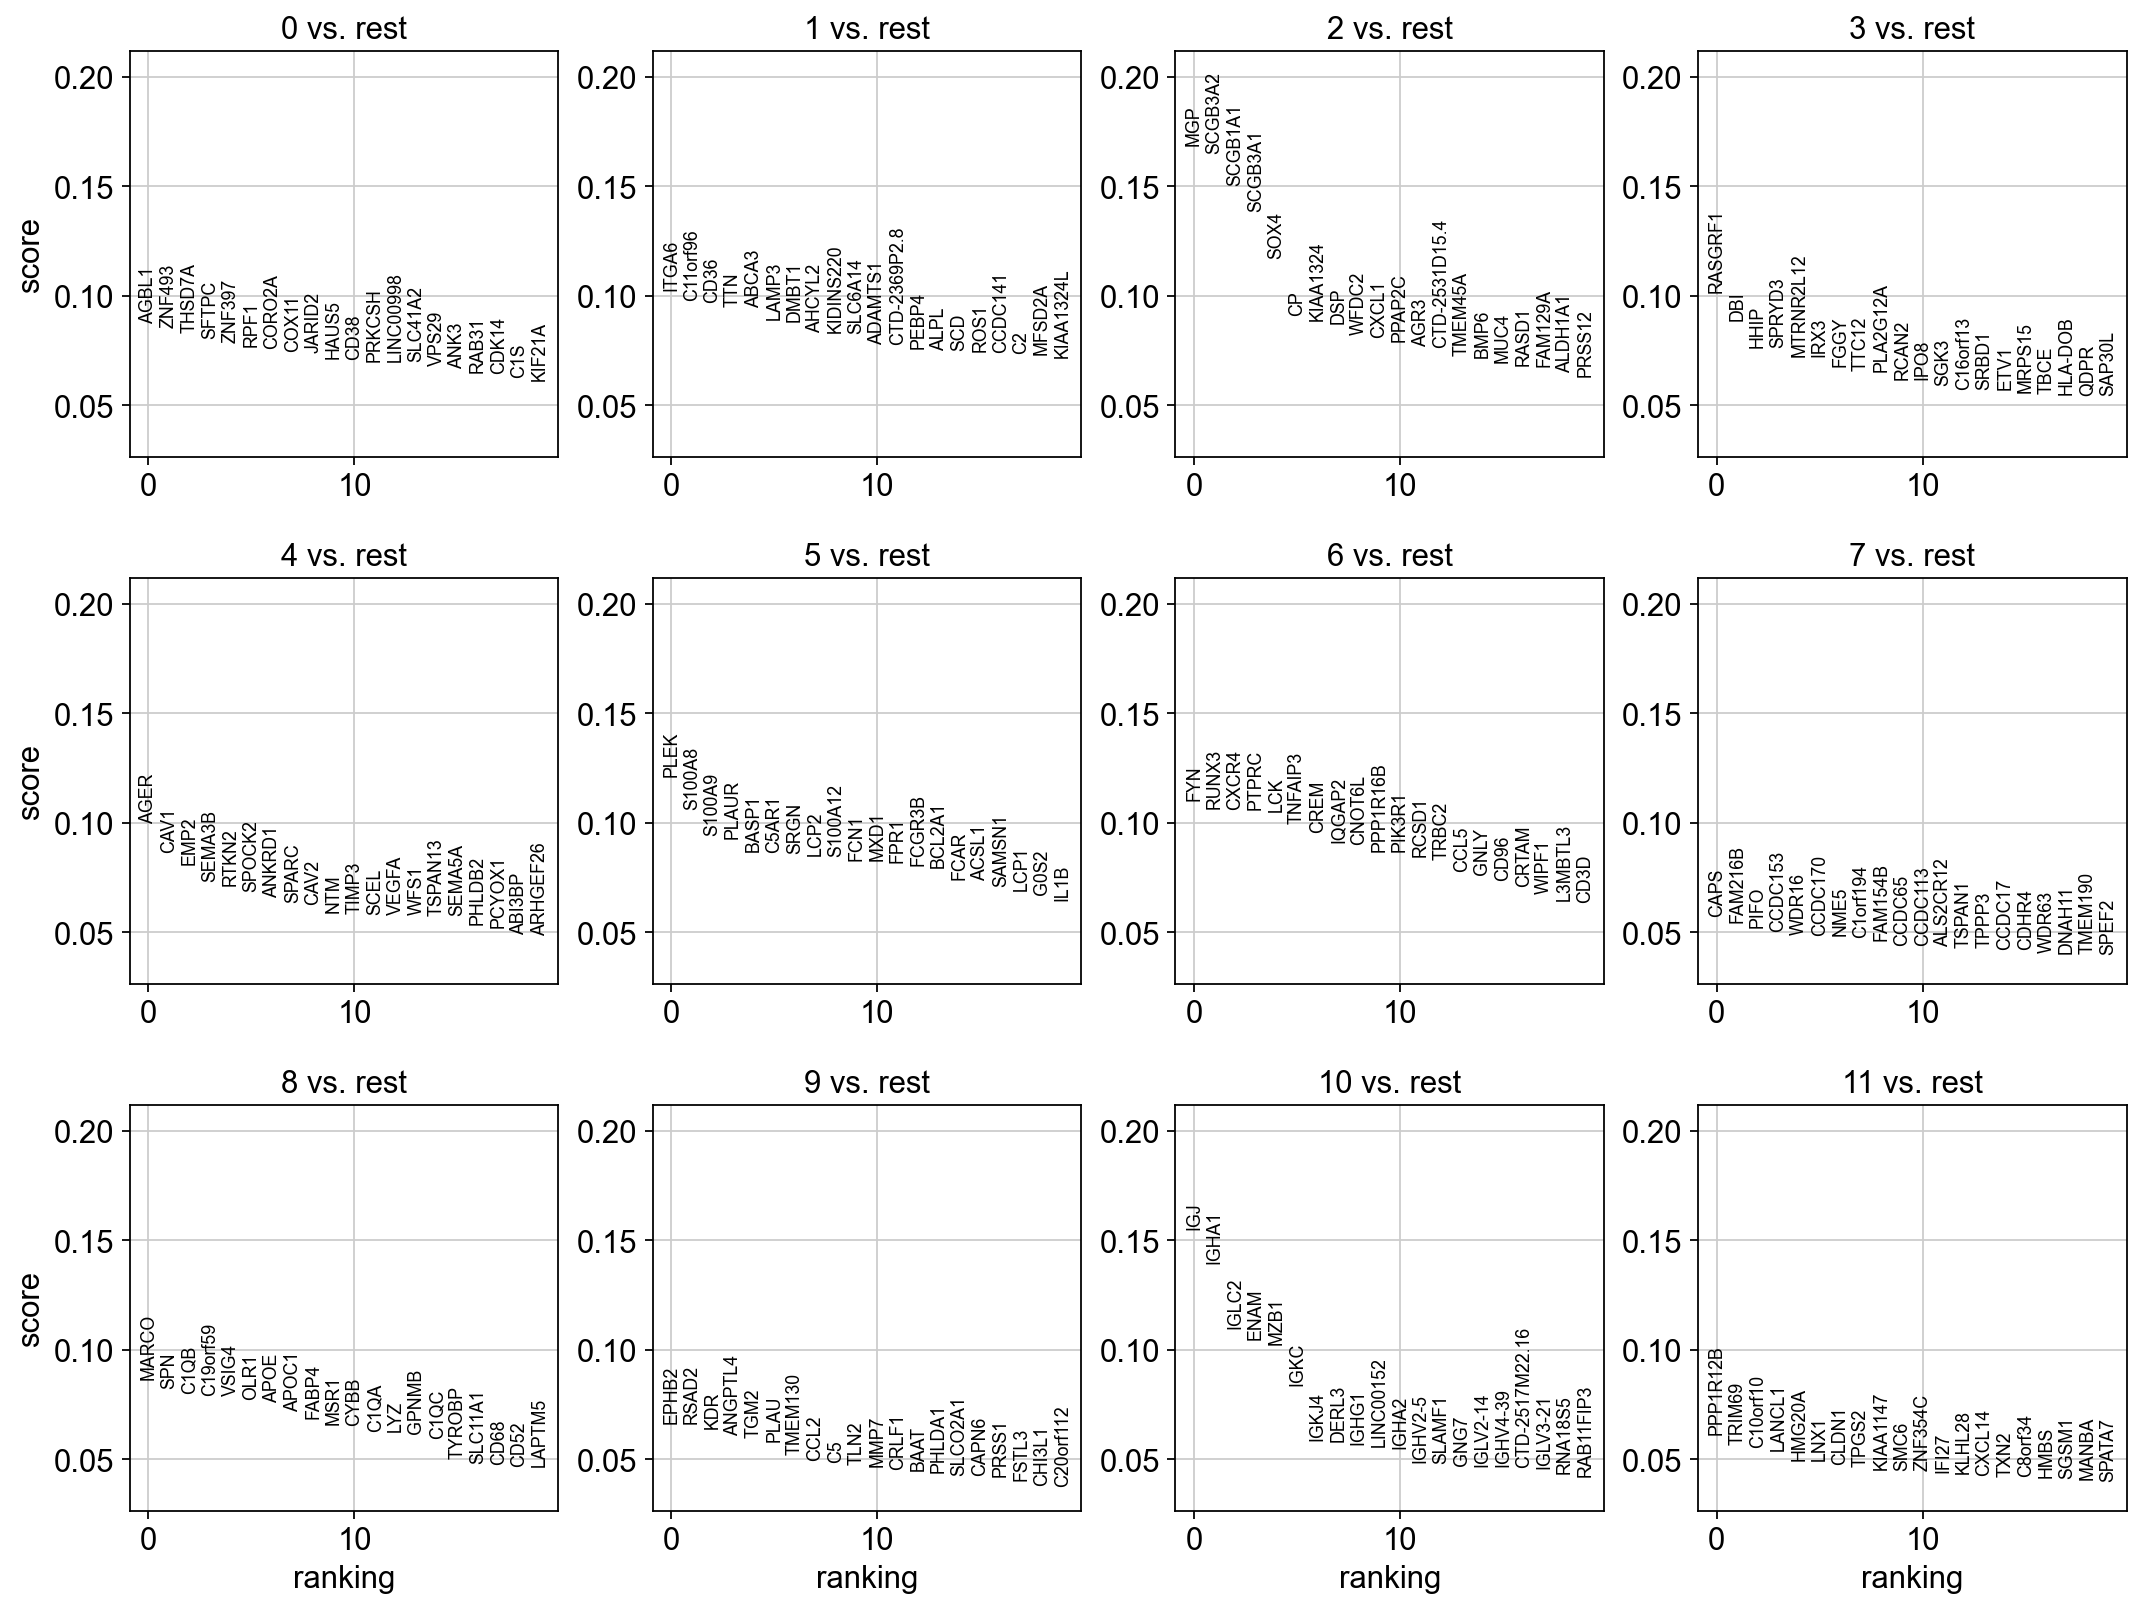

In [42]:
sc.pl.rank_genes_groups(adata, n_genes=20,save="differential_expression.png")

## Create zoomed-in view

In [43]:
adata = adata[adata.obs["EPCAM_raw"] > 0.0, :]
print(adata.X.shape)

(408, 5000)


In [44]:
sc.tl.pca(adata, n_comps=n_components)
sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=knn_n_pcs)
sc.tl.umap(adata, min_dist=umap_min_dist, spread=umap_spread)
sc.tl.leiden(adata)

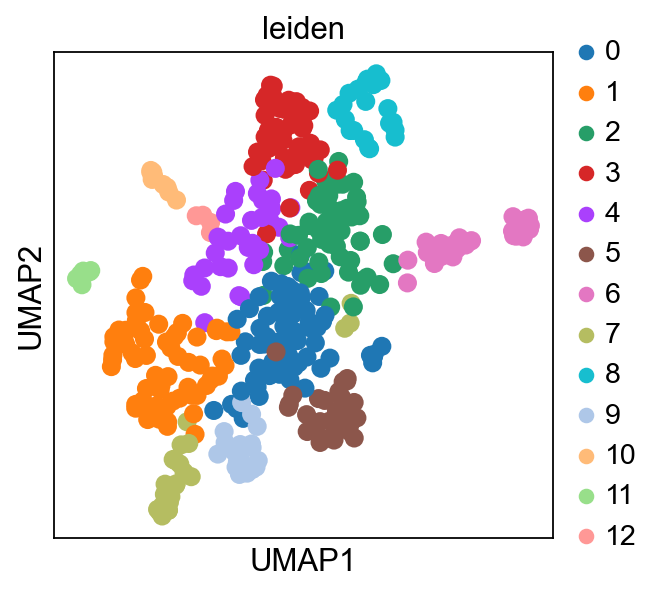

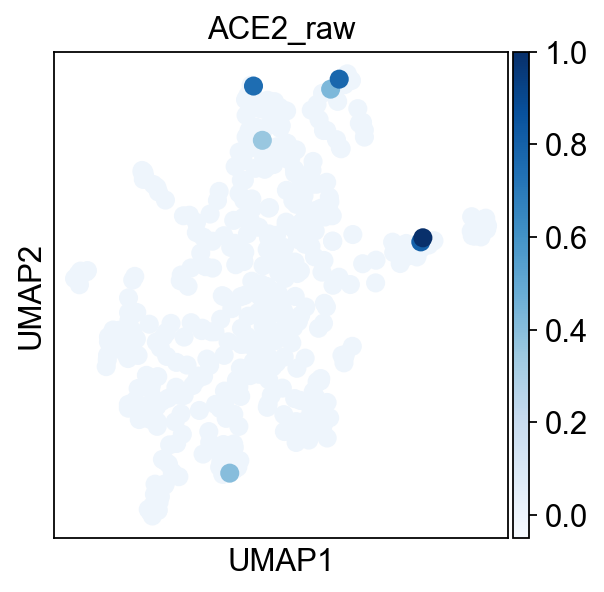

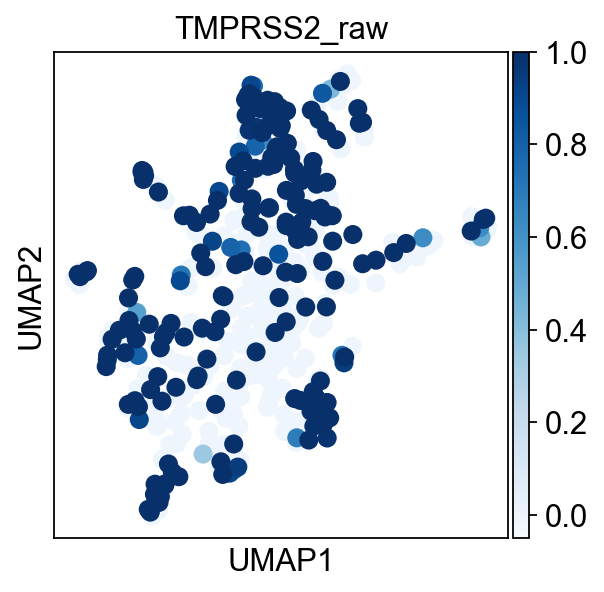

In [45]:
sc.pl.umap(adata, color=["leiden"],save="leiden_UMAP.png")
sc.pl.umap(adata, color=["ACE2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="UMAP_ACE2_raw.png")
sc.pl.umap(adata, color=["TMPRSS2_raw"], color_map="Blues", vmax=1, vmin=-0.05,save="UMAP_TMPRSS2_raw.png")

In [46]:
adata

AnnData object with n_obs × n_vars = 408 × 5000
    obs: 'n_genes', 'ACE2_raw', 'TMPRSS2_raw', 'EPCAM_raw', 'percent_ribo', 'n_counts', 'kmeans', 'louvain', 'leiden'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'pca', 'kmeans_colors', 'neighbors', 'umap', 'louvain', 'louvain_colors', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

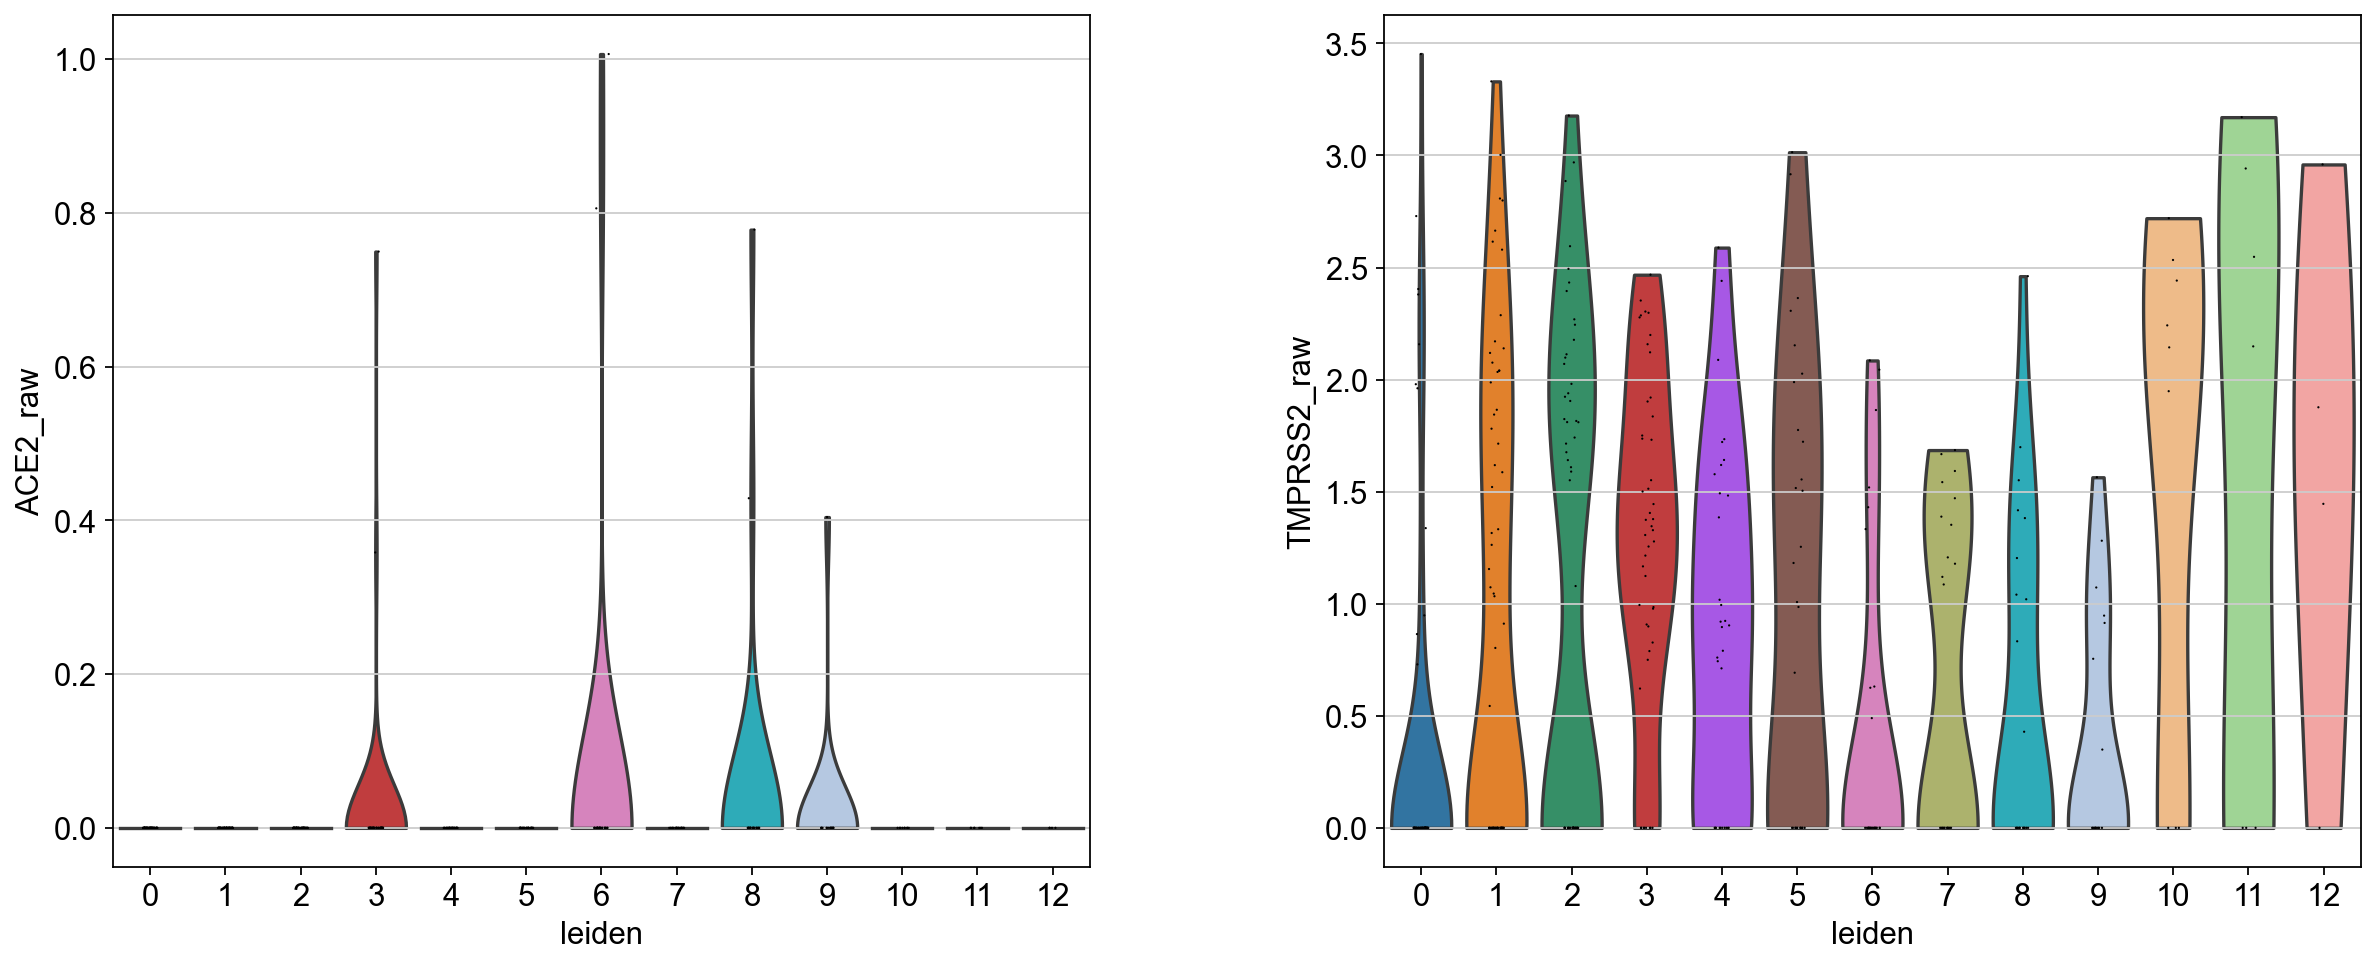

In [47]:
rcParams['figure.figsize'] = 7,7
sc.pl.violin(adata, ['ACE2_raw', 'TMPRSS2_raw'], groupby='leiden',save='violin_plot.png' )

In [48]:
data.head(10)

GENE,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AAED1,AAGAB,AAK1,...,MUM1L1,NEUROD1,NTF4,RP11-49K24.8,RP11-845C23.3,LINC00221,AC068610.3,AP000640.2,RP11-368P15.3,RP11-521C20.3
TACAGTGATAGC_1,0,1,0,0,0,0,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
GAATGTTACATC_1,0,1,0,0,4,0,2,1,2,0,...,0,0,0,0,0,0,0,0,0,0
GACAGTGATAGC_1,0,0,0,0,0,0,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
CCGTTGAAAGGA_1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TGTCTCAATGTA_1,0,0,0,0,0,0,0,2,1,0,...,0,0,0,0,0,0,0,0,0,0
CTCTCTTAACTC_1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
TCGGGCATGCCC_1,0,0,0,0,4,0,5,2,1,1,...,0,0,0,0,0,0,0,0,0,0
GGGCCAATCGCT_1,0,0,0,0,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
ATCCCGCCTGAA_1,0,0,0,0,1,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
CCCTACATGGTG_1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
import dataframe_image as dfi
dfi.export(data, 'lung_data.png',max_rows=10,max_cols=10)